In [85]:
import os

def save_statistics_to_csv(statistics_df,name):

    # Definir o caminho base
    base_path = 'Correlations_CSV'



    # Criar a subpasta se não existir
    os.makedirs(base_path, exist_ok=True)

    # Salvar o arquivo na subpasta apropriada
    file_path = os.path.join(base_path, name)
    statistics_df.to_csv(file_path)

    print(f"Arquivo salvo em: {file_path}")


# Coleção de Dados

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Coleção de dados por questão

In [87]:
execution_csv_src = '../output/metrics/executions.csv'
df_execution = pd.read_csv(execution_csv_src, index_col='question')
df_execution

,num_students_interactions,num_submissions,num_tests,num_correct,num_errors,num_logic_errors,num_syntax_errors,amount_of_change
question,,,,,,,,
5168,42,153,452,39,114,79,35,9187
5932,25,40,246,22,18,16,2,4506
6471,35,52,302,35,17,9,8,5784
6476,27,44,173,25,19,1,18,7405
5166,31,62,386,29,33,24,9,8903
...,...,...,...,...,...,...,...,...
7012,9,26,143,9,17,10,7,2497
6640,1,4,23,0,4,1,3,586
1654,3,6,47,3,3,3,0,3147


In [88]:
code_metrics_df = pd.read_csv(r'../code_metrics_professor_util.csv')
action_csv_src = '../output/metrics/actions_data.csv'
df_action = pd.read_csv(action_csv_src, index_col='question')
df_action = df_action[df_action.index.isin(code_metrics_df['question'])]
df_action

,code_time,num_events,num_deletes,num_blank
question,,,,
5932,94.596,21435,1211,27
6471,1040.063,17593,947,18
6481,3152.644,21869,1617,15
2968,6844.944,52306,2354,15
6751,207.999,10390,420,10
...,...,...,...,...
6014,429.353,15766,629,3
6012,594.166,10433,438,5
6750,0.000,4063,194,0


In [89]:
df = df_execution.merge(df_action, how='inner', left_index=True, right_index=True)

df

,num_students_interactions,num_submissions,num_tests,num_correct,num_errors,num_logic_errors,num_syntax_errors,amount_of_change,code_time,num_events,num_deletes,num_blank
question,,,,,,,,,,,,
5168,42,153,452,39,114,79,35,9187,1185.963,38646,2317,13
5932,25,40,246,22,18,16,2,4506,94.596,21435,1211,27
6471,35,52,302,35,17,9,8,5784,1040.063,17593,947,18
6476,27,44,173,25,19,1,18,7405,221.849,10042,552,13
5166,31,62,386,29,33,24,9,8903,0.000,25711,1765,11
...,...,...,...,...,...,...,...,...,...,...,...,...
6248,23,76,263,21,55,35,20,5406,2246.080,20890,912,8
6009,19,59,129,19,40,32,8,3096,349.110,14759,624,7
6013,22,30,108,22,8,7,1,1797,458.825,12316,584,0


## Coleção de dados por estudante

In [90]:
executions_csv_src = '../output/metrics/executions_by_student.csv'
df_exec_by_std = pd.read_csv(executions_csv_src)
df_exec_by_std['num_queries'] = df_exec_by_std.apply(
    lambda row: row['num_submissions'] + row['num_tests'],
    axis = 1
)
df_exec_by_std

,student,question,is_correct,num_submissions,num_tests,num_errors,num_logic_errors,num_syntax_errors,amount_of_change,num_queries
0,2970,5168,True,1,9,0,0,0,552,10
1,2970,5932,True,2,12,1,1,0,237,14
2,2970,6471,True,2,7,1,0,1,96,9
3,2970,6476,True,1,3,0,0,0,66,4
4,4296,5166,True,1,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...
7060,9958,6837,True,4,7,3,2,1,60,11
7061,9958,1647,True,5,6,4,0,4,66,11
7062,9958,2846,True,2,1,1,0,1,3,3
7063,9958,6360,True,3,19,2,2,0,356,22


In [91]:
actions_csv_src = '../output/metrics/actions_by_student.csv'
df_action_by_std = pd.read_csv(actions_csv_src)
df_action_by_std.drop(columns=['last_time'], inplace=True)
df_action_by_std

,student,question,is_correct,submitted,code_time,num_events,num_deletes
0,2970,5932,False,True,1172.463,1504,93
1,2970,6471,False,True,761.605,970,27
2,4296,6481,False,True,259.985,631,38
3,4296,2968,False,True,270.513,921,3
4,4296,6733,False,True,640.347,1409,42
...,...,...,...,...,...,...,...
3751,9958,6654,False,True,272.363,1590,32
3752,9958,6837,False,True,265.960,1604,68
3753,9958,1647,False,True,591.647,1834,80
3754,9958,2846,False,True,249.975,1080,34


In [92]:
def plot_config(data, columns, labels = None):
    plt.figure(figsize=(21, 10))
    bplots = plt.boxplot(data[columns], tick_labels=labels, vert = 0, patch_artist = True)
    colors = ['#6890F0', '#705898', '#98D8D8', '#4DB6AC', '#56CBF9', '#EC4E20', '#016FB9']

    for i, bplot in enumerate(bplots['boxes']):
        bplot.set(color='gray', linewidth=1.5)
        bplot.set(facecolor=colors[i])

    for whisker in bplots['whiskers']:
        whisker.set(color='gray', linewidth=1.5)

    for cap in bplots['caps']:
        cap.set(color='gray', linewidth=1.5)

    for median in bplots['medians']:
        median.set(color='gray', linewidth=1.5)

    # ax = sns.boxplot(data=df_exec_by_std, y = 'amount_of_change', linewidth = 5, palette=colors)
    # plt.boxplot(x='num_errors', data=df_exec_by_std, vert=0, conf_intervals='num_errors', patch_artist=False)
    plt.show()

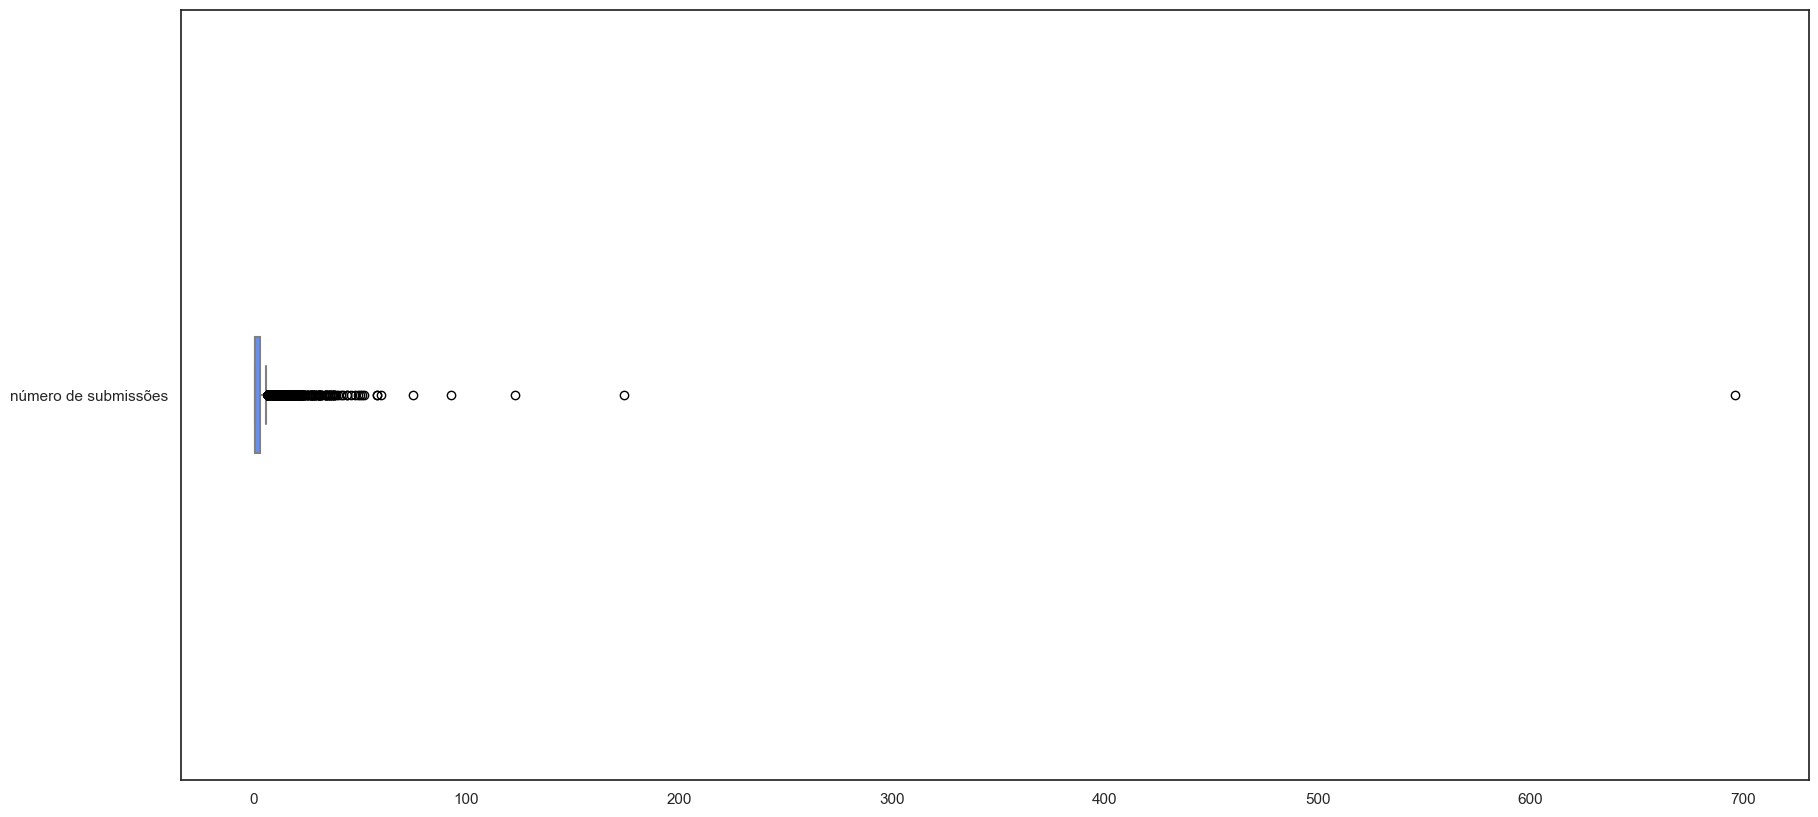

In [93]:
columns = ['num_submissions']
labels = ['número de submissões']
plot_config(df_exec_by_std, columns, labels)

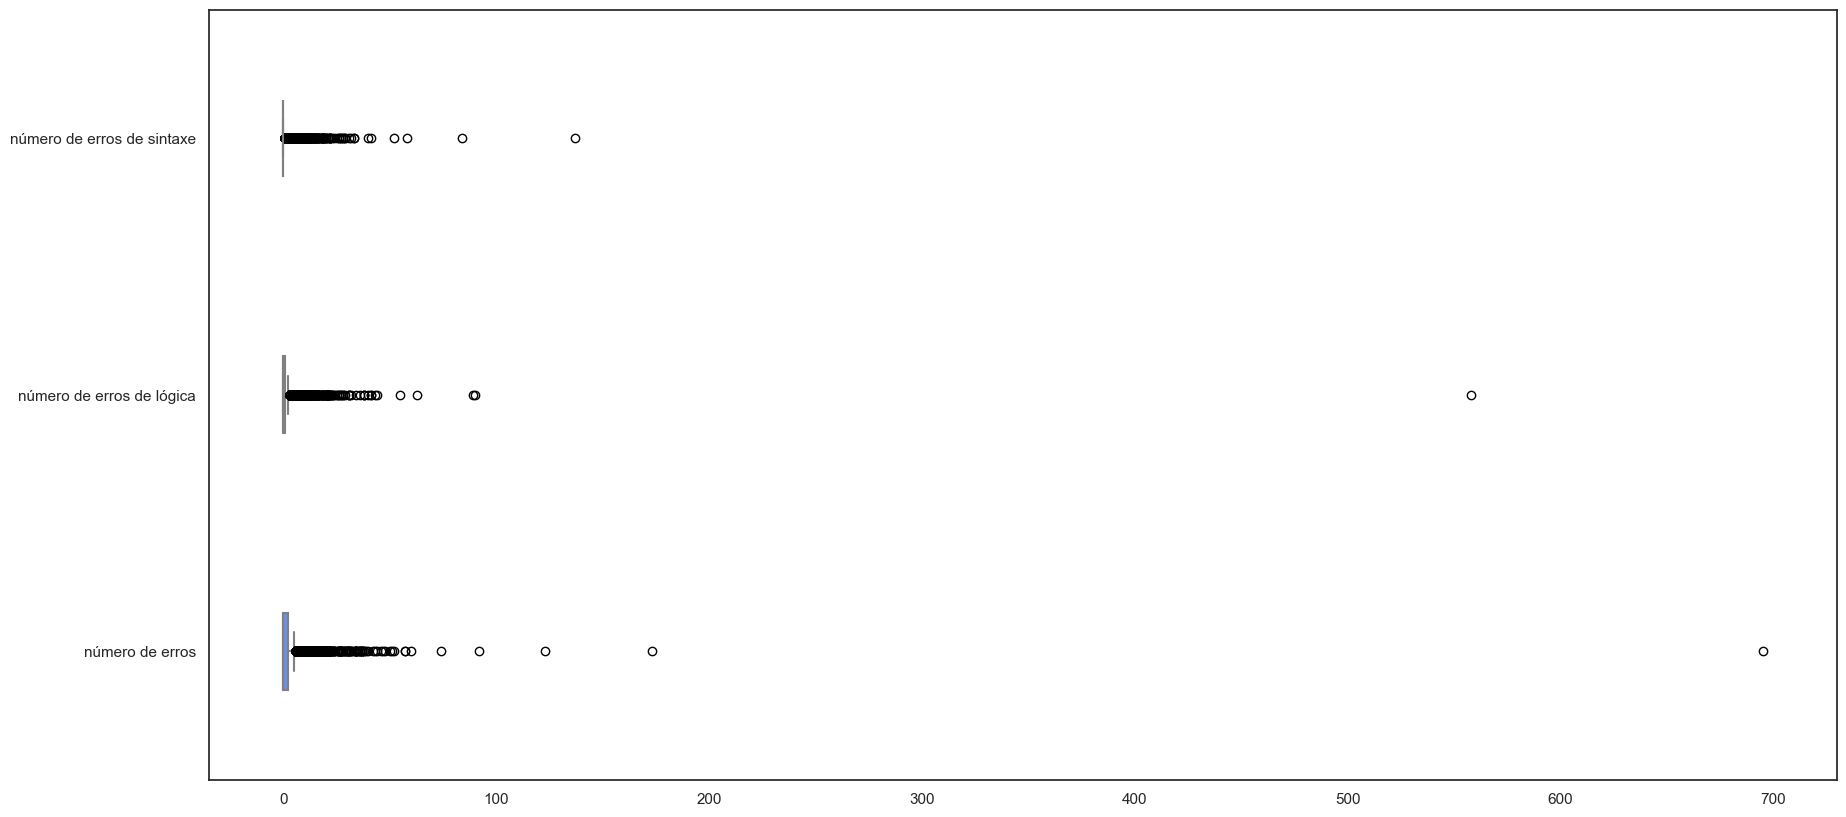

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir as colunas e seus rótulos
columns = ['num_errors', 'num_logic_errors', 'num_syntax_errors']
labels = ['número de erros', 'número de erros de lógica', 'número de erros de sintaxe']


plot_config(df_exec_by_std, columns, labels)


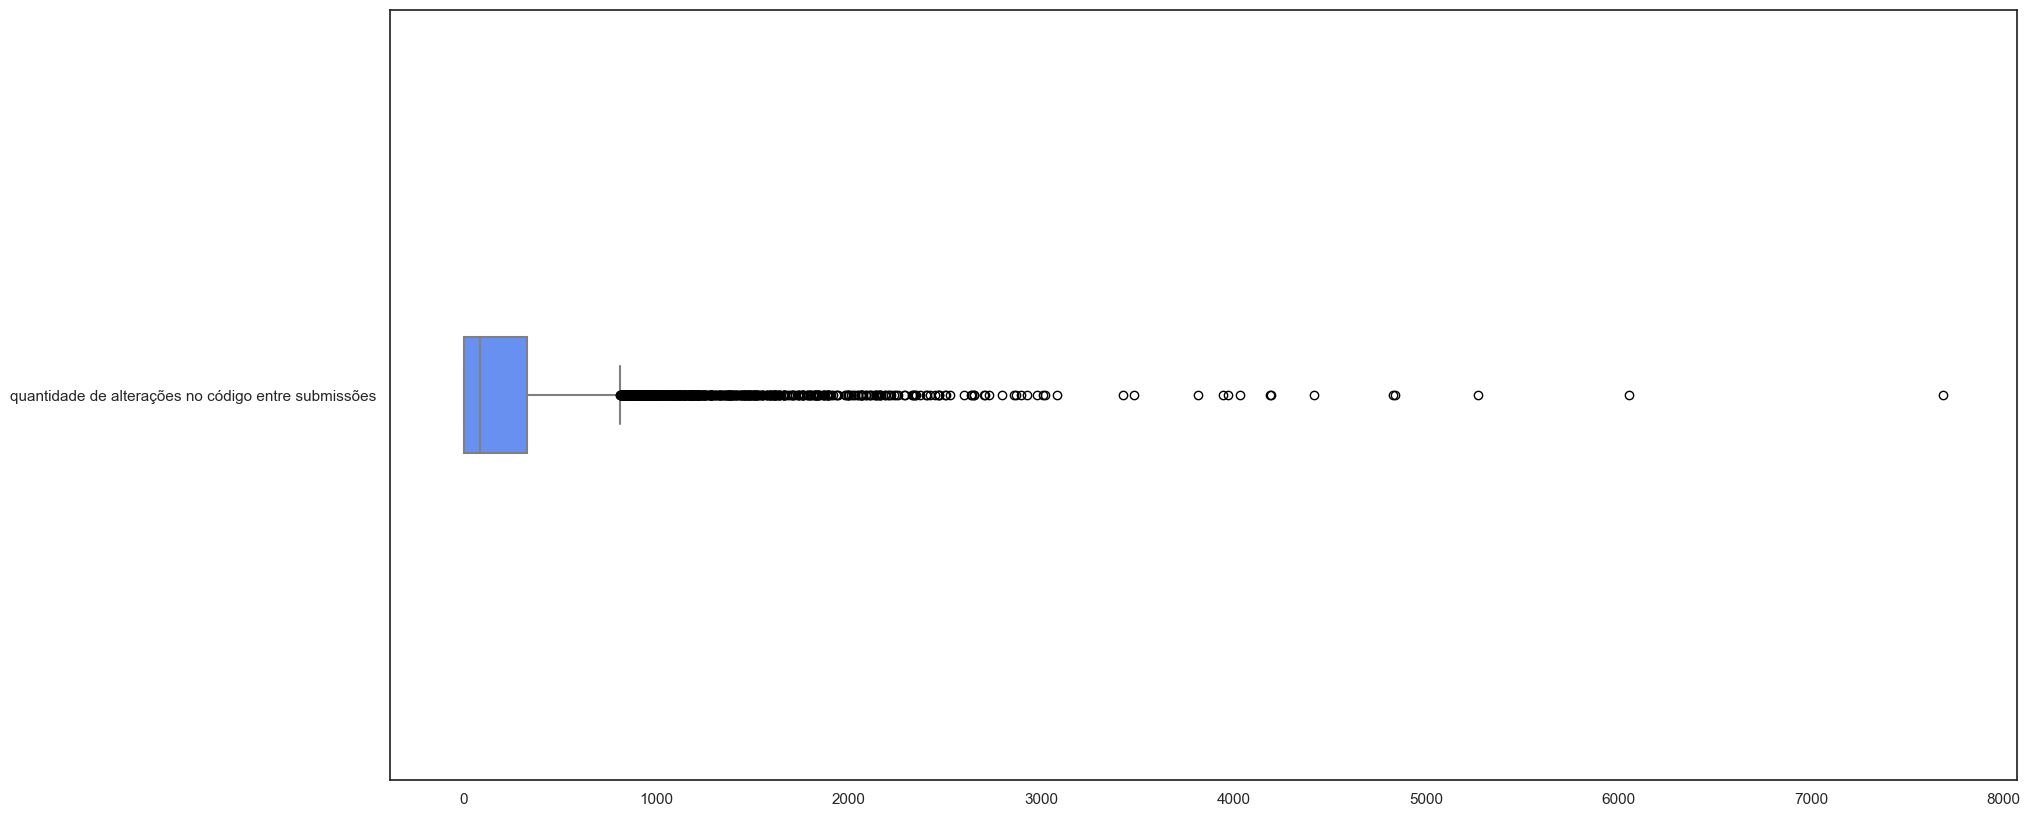

In [95]:
import pandas as pd
import matplotlib.pyplot as plt


columns = ['amount_of_change']
labels = ['quantidade de alterações no código entre submissões']
plot_config(df_exec_by_std, columns, labels)

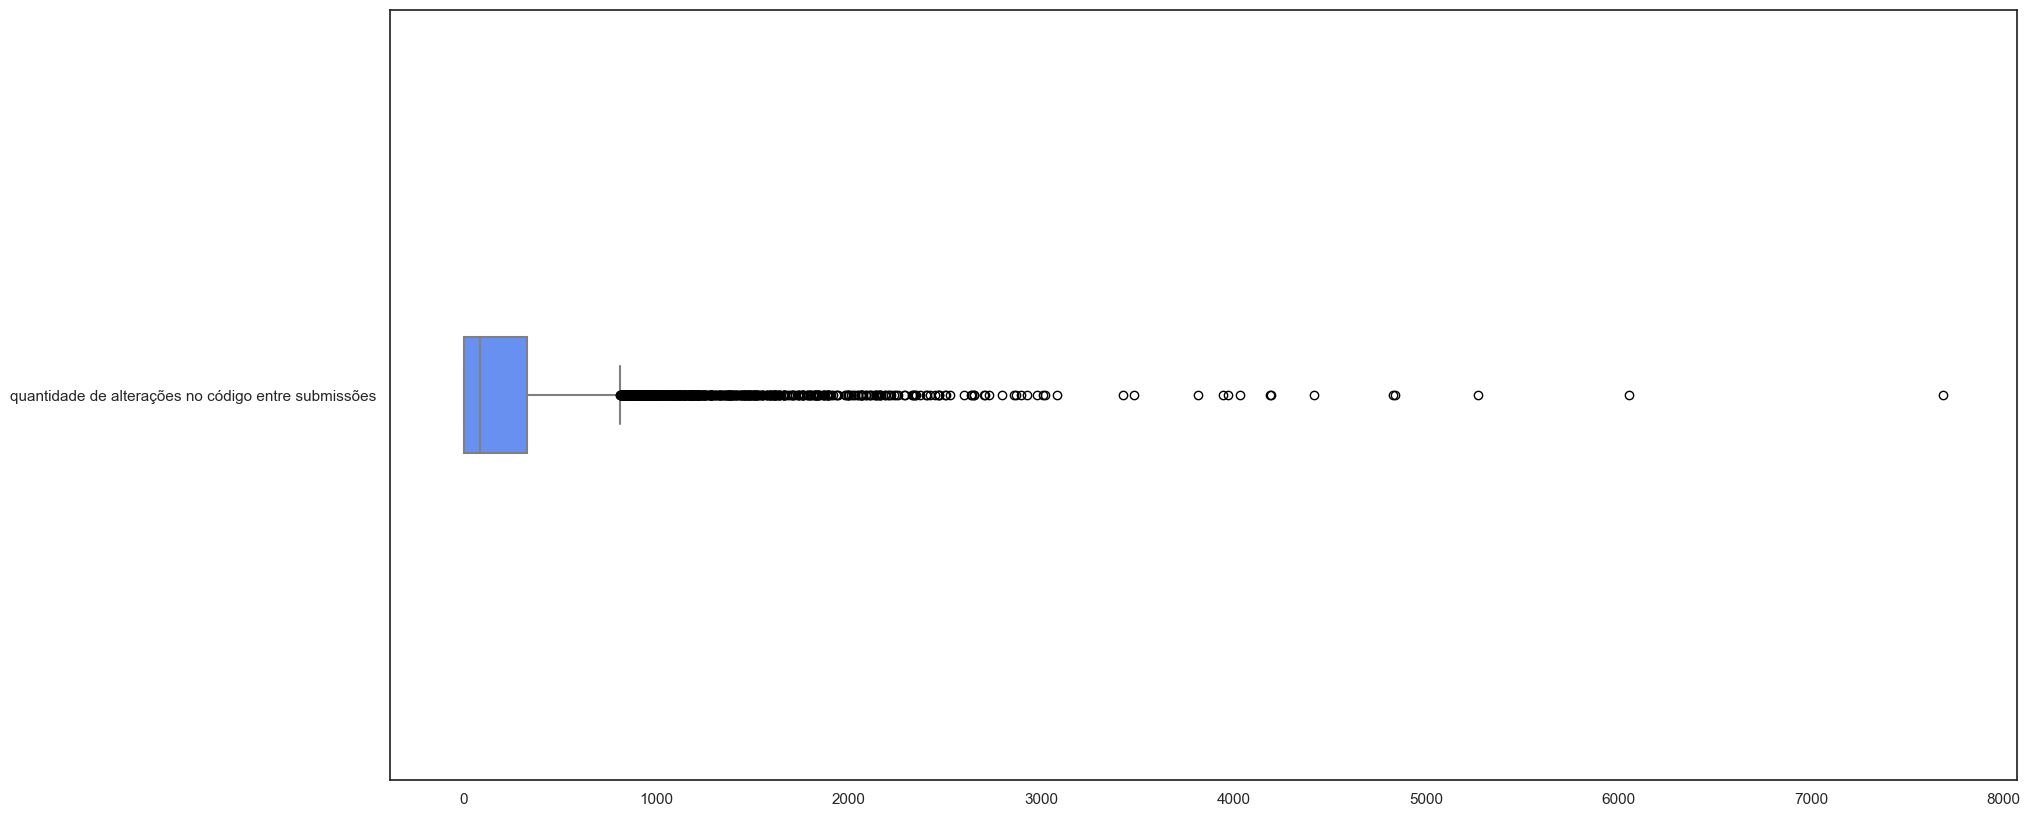

In [96]:
import pandas as pd
import matplotlib.pyplot as plt


columns = ['amount_of_change']
labels = ['quantidade de alterações no código entre submissões']
plot_config(df_exec_by_std, columns, labels)


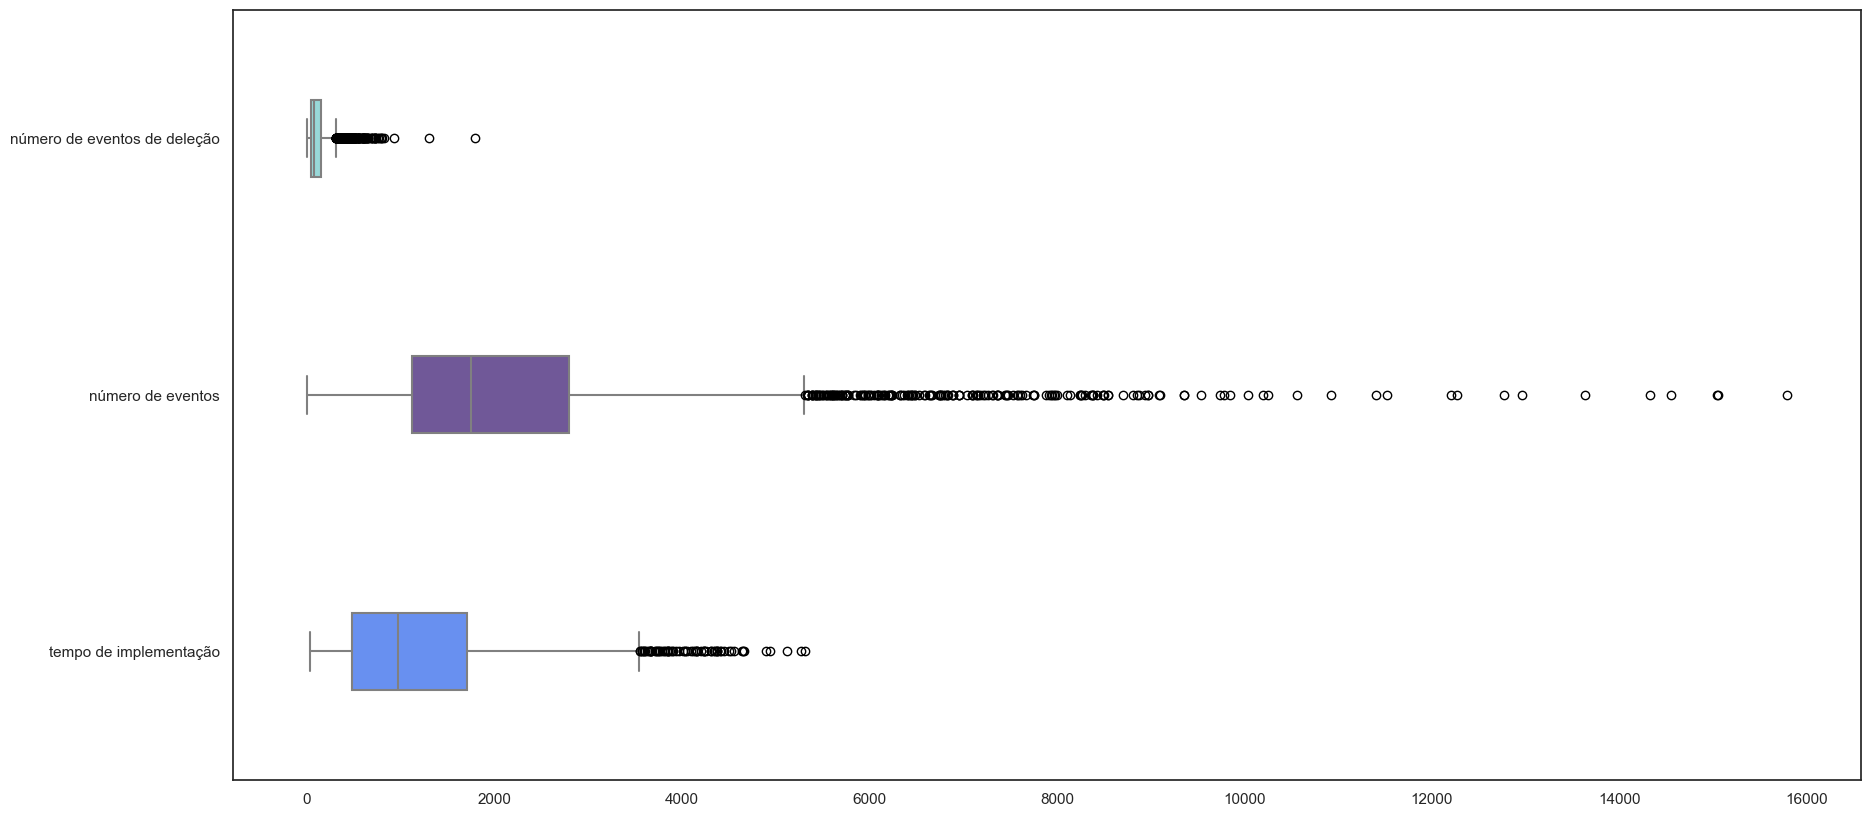

In [97]:
columns = ['code_time', 'num_events', 'num_deletes']
labels = ['tempo de implementação', 'número de eventos', 'número de eventos de deleção']
plot_config(df_action_by_std, columns, labels)

In [98]:
statistics_df = pd.DataFrame()

In [99]:
"""
statistics_df['taxa_acerto'] = \
    df.apply(lambda row: row['num_correct'] / row['num_students_interactions'], axis = 1)
"""
statistics_df['num_submissoes'] = \
    df.apply(lambda row: row['num_submissions'] / row['num_students_interactions'], axis = 1)

statistics_df['taxa_aceitacao'] = \
    df.apply(lambda row: row['num_correct'] / row['num_submissions'], axis = 1)

statistics_df['num_testes'] = \
    df.apply(lambda row: row['num_tests'] / row['num_students_interactions'], axis = 1)

statistics_df['num_consultas'] = \
    df.apply(lambda row: (row['num_submissions'] + row['num_tests']) / row['num_students_interactions'], axis = 1)

In [100]:
statistics_df['num_erros'] = \
    df.apply(lambda row: row['num_errors'] / row['num_students_interactions'], axis = 1)
"""
statistics_df['num_erros_lgcs'] = \
    df.apply(lambda row: row['num_logic_errors'] / row['num_students_interactions'], axis = 1)

statistics_df['num_errors_stx'] = \
    df.apply(lambda row: row['num_syntax_errors'] / row['num_students_interactions'], axis = 1)
"""
statistics_df['num_eventos'] = \
    df.apply(lambda row: row['num_events'] / row['num_students_interactions'], axis = 1)

statistics_df['num_eventos_del'] = \
    df.apply(lambda row: row['num_deletes'] / row['num_students_interactions'], axis = 1)

statistics_df['tempo_implementacao'] = \
    df.apply(lambda row: row['code_time'] / row['num_correct'], axis = 1)
"""
statistics_df['num_std_sem_submissao'] = \
    df.apply(lambda row: row['num_blank'], axis = 1)
"""
statistics_df['qtd_alteracoes_codigo'] = \
    df.apply(lambda row: row['amount_of_change'] / row['num_students_interactions'], axis = 1)

In [101]:
statistics_df

,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_eventos,num_eventos_del,tempo_implementacao,qtd_alteracoes_codigo
question,,,,,,,,,
5168,3.642857,0.254902,10.761905,14.404762,2.714286,920.142857,55.166667,30.409308,218.738095
5932,1.600000,0.550000,9.840000,11.440000,0.720000,857.400000,48.440000,4.299818,180.240000
6471,1.485714,0.673077,8.628571,10.114286,0.485714,502.657143,27.057143,29.716086,165.257143
6476,1.629630,0.568182,6.407407,8.037037,0.703704,371.925926,20.444444,8.873960,274.259259
5166,2.000000,0.467742,12.451613,14.451613,1.064516,829.387097,56.935484,0.000000,287.193548
...,...,...,...,...,...,...,...,...,...
6248,3.304348,0.276316,11.434783,14.739130,2.391304,908.260870,39.652174,106.956190,235.043478
6009,3.105263,0.322034,6.789474,9.894737,2.105263,776.789474,32.842105,18.374211,162.947368
6013,1.363636,0.733333,4.909091,6.272727,0.363636,559.818182,26.545455,20.855682,81.681818


In [102]:
import pandas as pd

# Caminho para o arquivo question_new_info.csv
question_info_path = r"../question_new_info.csv"

# Carregar o arquivo question_new_info.csv
question_info = pd.read_csv(question_info_path)

# Selecionar apenas as colunas relevantes do question_info
question_info = question_info[['question', 'dificuldade', 'discriminacao']]

# Resetar o índice de statistics_df para transformar o índice 'question' em coluna
statistics_df = statistics_df.reset_index()

# Mesclar statistics_df com question_info
statistics_df = pd.merge(
    statistics_df,
    question_info,
    on='question',  # Usa a coluna 'question' como chave para a mesclagem
    how='left'  # Mantém todas as linhas de statistics_df
)

# Definir novamente a coluna 'question' como índice
statistics_df = statistics_df.set_index('question')

statistics_df.rename(columns={'dificuldade': 'taxa de erro'}, inplace=True)
# Exibir o resultado
statistics_df
save_statistics_to_csv(statistics_df,'question_info.csv') 



Arquivo salvo em: Correlations_CSV\question_info.csv


In [103]:
statistics_df.describe()

,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_eventos,num_eventos_del,tempo_implementacao,qtd_alteracoes_codigo,taxa de erro,discriminacao
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,3.293455,0.356831,10.772595,14.066050,2.358495,1165.482644,58.883957,118.034306,263.649824,15.907373,0.085392
std,2.578058,0.159920,4.773591,6.448178,2.595763,701.372893,36.341844,106.104312,170.604591,10.159736,0.053593
min,1.117647,0.023758,2.571429,4.000000,0.117647,150.481481,7.185185,0.000000,11.800000,0.000000,-0.060000
25%,2.111111,0.240000,7.361111,9.736842,1.142857,739.142857,34.322581,31.760367,164.920000,8.820000,0.050000
50%,2.870968,0.326531,10.000000,13.142857,1.914286,1001.259259,51.033333,92.400545,228.818182,14.290000,0.090000
75%,3.800000,0.454545,13.333333,16.666667,2.862069,1354.259259,74.928571,168.492000,315.666667,20.690000,0.130000
max,34.296296,0.894737,29.281250,58.592593,33.481481,4472.375000,224.343750,519.743200,1158.968750,57.140000,0.210000


# Função para Salvar as Imagens Geradas

In [104]:
import os
import matplotlib.pyplot as plt

def save_plot_image(title: str, base_dir: str = "Figures", sub_dir: str = "Correlations"):
    """
    Salva a imagem do gráfico com o nome baseado no título.
    
    Parameters:
        title (str): O título do gráfico, que será usado como nome do arquivo.
        base_dir (str): O diretório base onde a imagem será salva. Padrão é "Figures".
        sub_dir (str): O subdiretório onde a imagem será salva. Padrão é "Correlations".
    """
    # Formatar o nome da imagem com base no título
    image_name = title.replace(" ", "_").replace(":", "").replace("-", "_") + ".png"

    # Criar os diretórios se não existirem
    full_sub_dir = os.path.join(base_dir, sub_dir)
    os.makedirs(full_sub_dir, exist_ok=True)  # Criar diretórios se não existirem

    # Ajustar layout para evitar cortes
    plt.tight_layout()

    # Caminho completo para salvar a imagem
    image_path = os.path.join(full_sub_dir, image_name)

    # Salvar a figura
    plt.savefig(image_path, dpi=300, bbox_inches='tight')  # 'bbox_inches' ajusta a área visível na imagem

    # Fechar a figura após salvar
    

    print(f"Imagem salva em: {image_path}")


## Correlação entre variáveis (spearman)

In [105]:

variaveis = statistics_df.columns
variaveis

Index(['num_submissoes', 'taxa_aceitacao', 'num_testes', 'num_consultas',
       'num_erros', 'num_eventos', 'num_eventos_del', 'tempo_implementacao',
       'qtd_alteracoes_codigo', 'taxa de erro', 'discriminacao'],
      dtype='object')

### Explicação do Código

#### Objetivo
Este código calcula e visualiza a **correlação de Spearman** entre diversas métricas relacionadas à dificuldade de problemas. O objetivo principal é identificar como essas métricas se relacionam entre si, ajudando na análise da complexidade e do comportamento dos usuários em relação às atividades avaliadas.

#### Etapas do Código

1. **Definição das Variáveis**:  
   - A lista `variaveis` contém os nomes das métricas numéricas que serão analisadas. Estas variáveis representam aspectos como taxas de acerto, número de submissões, erros lógicos e sintáticos, entre outros. 
   - A lista `labels` define os rótulos amigáveis para apresentação no gráfico.

2. **Preenchimento de Valores Nulos**:  
   - Caso a métrica `tempo_implementacao` contenha valores ausentes (`NaN`), eles são substituídos por `0`.  
   - Isso é necessário para evitar erros durante o cálculo da correlação.

3. **Normalização dos Dados**:  
   - As variáveis selecionadas são normalizadas usando o **`StandardScaler`**.  
   - A normalização garante que todas as métricas estejam na mesma escala, evitando que métricas com valores muito altos ou baixos distorçam a análise.

4. **Cálculo da Correlação de Spearman**:  
   - A correlação de Spearman é calculada para todas as variáveis da lista `variaveis`.  
   - Este método mede a relação monotônica entre variáveis, sendo robusto para dados que não apresentam relações lineares.

5. **Criação de um DataFrame para Correlação**:  
   - Os resultados da correlação são armazenados em um DataFrame, facilitando a manipulação e visualização dos dados.

6. **Plotagem do Heatmap**:  
   - Um **heatmap** é gerado usando o Seaborn para exibir visualmente as correlações entre as métricas.
   - Principais características do gráfico:
     - **Cores**: A escala de cores "coolwarm" diferencia correlações positivas (próximas de 1) e negativas (próximas de -1).
     - **Anotações**: Os valores numéricos das correlações são exibidos em cada célula.
     - **Tamanho Ajustado**: O gráfico é dimensionado para melhorar a legibilidade.

7. **Personalização do Gráfico**:  
   - Os rótulos do eixo são rotacionados para facilitar a leitura.
   - Um título descritivo é adicionado para contextualizar o gráfico.

#### Resultado Esperado
O código gera um **heatmap** detalhado que permite:
- Identificar relações fortes (positivas ou negativas) entre as métricas.
- Entender como diferentes aspectos do desempenho e da dificuldade estão interconectados.

#### Aplicações
Este tipo de análise pode ser útil para:
- Ajustar critérios de avaliação em sistemas educacionais.
- Diagnosticar métricas que influenciam mais diretamente o desempenho.
- Propor melhorias na formulação de problemas ou atividades.


Imagem salva em: Figures\Correlations\Correlação_de_Spearman_para_Métricas_de_Dificuldade.png


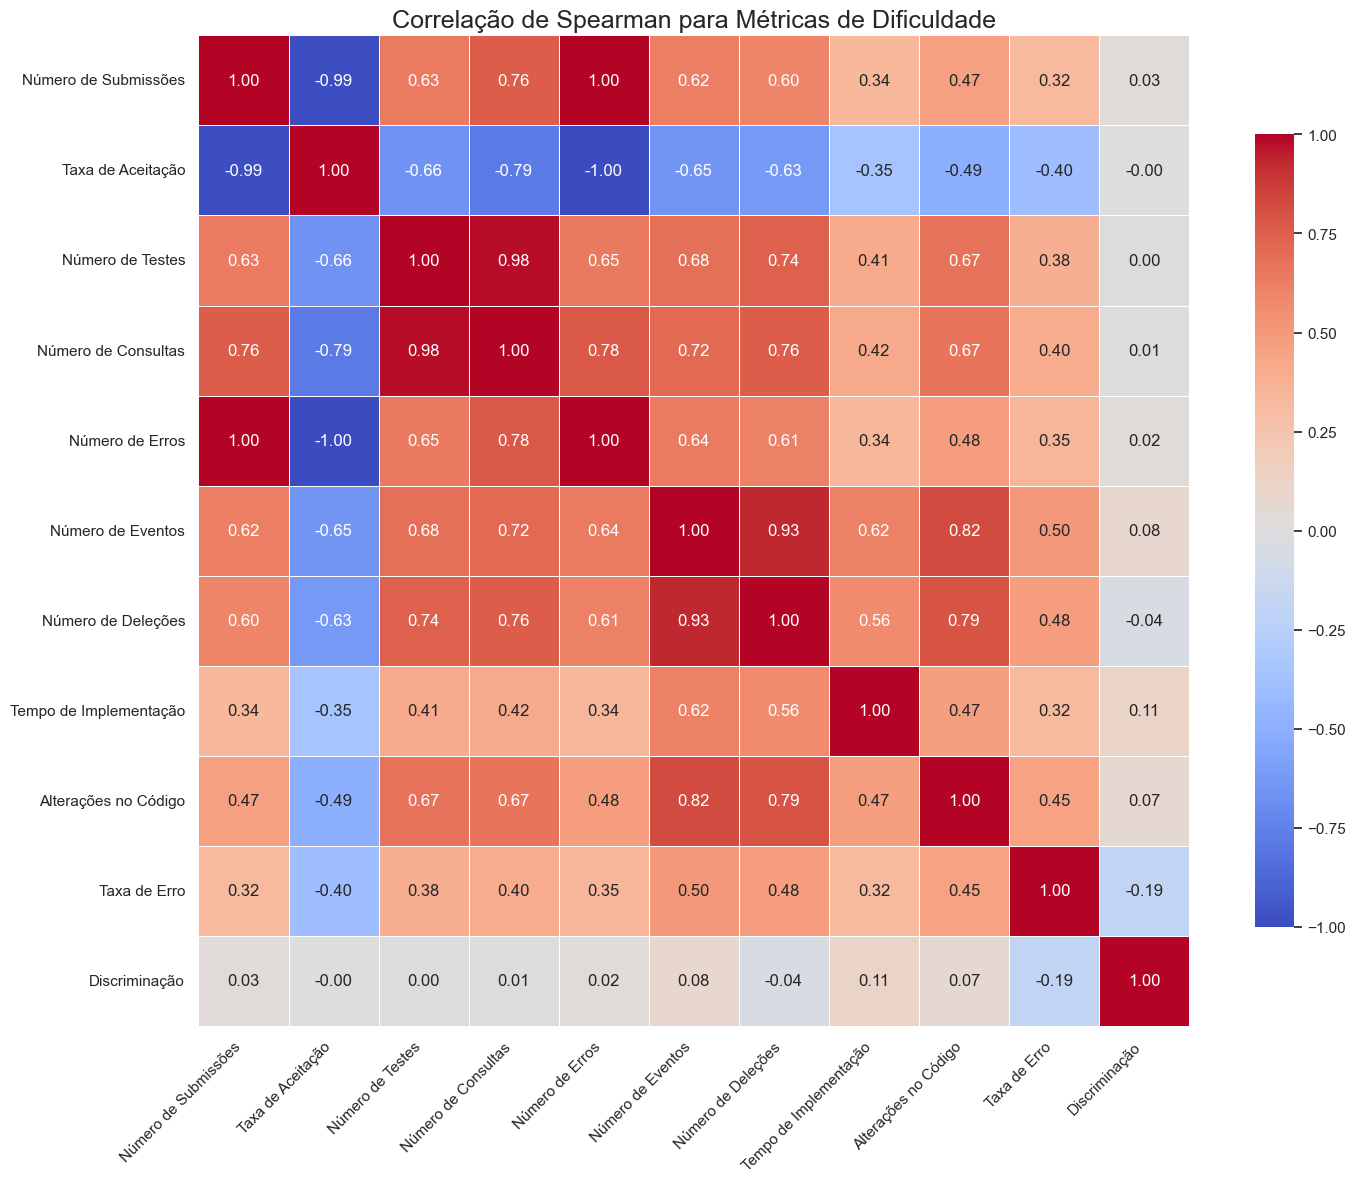

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler

# Definir variáveis numéricas para cálculo da correlação, excluindo 'taxa_acerto'
variaveis = [
    'num_submissoes', 'taxa_aceitacao', 'num_testes', 'num_consultas',
    'num_erros',  'num_eventos', 'num_eventos_del',
    'tempo_implementacao', 'qtd_alteracoes_codigo',
    'taxa de erro', 'discriminacao'  # Corrigido para "taxa de erro"
]

# Rótulos para o gráfico, excluindo 'Taxa de Acerto'
labels = [
    'Número de Submissões', 'Taxa de Aceitação', 'Número de Testes',
    'Número de Consultas', 'Número de Erros',  'Número de Eventos', 'Número de Deleções',
    'Tempo de Implementação', 'Alterações no Código',
    'Taxa de Erro', 'Discriminação'
]

# Substituir valores NaN (caso existam) em 'tempo_implementacao' com 0 (ou outro valor adequado)
statistics_df['tempo_implementacao'] = statistics_df['tempo_implementacao'].fillna(0)

# Normalizar todas as variáveis para garantir que todas fiquem na mesma escala
scaler = StandardScaler()
statistics_df[variaveis] = scaler.fit_transform(statistics_df[variaveis])

# Calcular correlação de Spearman de forma mais eficiente para o DataFrame inteiro
spearman_corr, p_vals = spearmanr(statistics_df[variaveis], axis=0)

# Criar um DataFrame para a correlação de Spearman
df_corr = pd.DataFrame(spearman_corr, index=variaveis, columns=variaveis)

# Plotar o heatmap com ajustes no tamanho dos quadrados
sns.set(style="white")
plt.figure(figsize=(15, 12))  # Aumentar tamanho da figura
ax = sns.heatmap(
    df_corr,  # Correlação de Spearman
    vmin=-1, vmax=1, annot=True, fmt='.2f', cmap="coolwarm", 
    xticklabels=labels, yticklabels=labels, square=True, cbar_kws={"shrink": .8}, 
    linewidths=0.5  # Adicionar espaço entre os quadrados
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Correlação de Spearman para Métricas de Dificuldade", fontsize=18)  # Título maior
plt.tight_layout()


save_plot_image(plt.gca().get_title())

plt.show()


In [107]:
df_corr

,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_eventos,num_eventos_del,tempo_implementacao,qtd_alteracoes_codigo,taxa de erro,discriminacao
num_submissoes,1.000000,-0.989936,0.634314,0.764678,0.998569,0.623315,0.599989,0.335657,0.466400,0.318539,0.030108
taxa_aceitacao,-0.989936,1.000000,-0.663606,-0.788057,-0.995186,-0.651565,-0.629585,-0.354265,-0.493286,-0.401444,-0.004437
num_testes,0.634314,-0.663606,1.000000,0.978632,0.647197,0.680239,0.744966,0.412139,0.673943,0.384844,0.000765
num_consultas,0.764678,-0.788057,0.978632,1.000000,0.775534,0.717138,0.762755,0.418542,0.669726,0.400223,0.013583
num_erros,0.998569,-0.995186,0.647197,0.775534,1.000000,0.635206,0.612202,0.343361,0.478129,0.347620,0.023049
num_eventos,0.623315,-0.651565,0.680239,0.717138,0.635206,1.000000,0.932940,0.617104,0.820527,0.502052,0.080481
num_eventos_del,0.599989,-0.629585,0.744966,0.762755,0.612202,0.932940,1.000000,0.562599,0.791925,0.478995,-0.040776
tempo_implementacao,0.335657,-0.354265,0.412139,0.418542,0.343361,0.617104,0.562599,1.000000,0.473167,0.319897,0.109887
qtd_alteracoes_codigo,0.466400,-0.493286,0.673943,0.669726,0.478129,0.820527,0.791925,0.473167,1.000000,0.453650,0.066981
taxa de erro,0.318539,-0.401444,0.384844,0.400223,0.347620,0.502052,0.478995,0.319897,0.453650,1.000000,-0.190382


# Correlação para variáveis independentes

In [108]:
# Obtém csv com as métricas de código da solução do instrutor
code_prof_df = pd.read_csv(r'..\code_metrics_professor_util.csv', index_col='question')
code_prof_df = code_prof_df[code_prof_df.index.isin(df.index)]

code_prof_df

,complexity,n_classes,n_functions,loc,lloc,sloc,comments,single_comments,multi_comments,blank_lines,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
question,,,,,,,,,,,,,,,,,,,,,
1640,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,6,1,3.40
1641,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,6,1,3.40
1642,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,6,1,3.40
1643,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,9,1,3.70
1644,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,10,1,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6834,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,NaN,2.0,1.0,1.0,0,4,4,8,1,4.75
6835,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,NaN,2.0,1.0,1.0,0,4,4,8,1,4.75
6836,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,NaN,2.0,1.0,1.0,0,4,4,8,1,4.75


In [109]:
# Dataset de métricas de código (autoria de Marcos Avner)
CODE_SRC = '../../../Etapa_1/unified_solutions.csv'
code_df = pd.read_csv(CODE_SRC)
code_df = code_df.apply(lambda col: col.map(lambda x: 0.0 if x == '[]' else x))


code_df

,semester,course,assignment,user,problem,complexity,classes,functions,functions_complexity,classes_complexity,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
0,2023-2,557,5213,2970,1328,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,1,0,0,0,0.000000
1,2023-2,557,5213,2970,1329,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,1,0,0,0,0.000000
2,2023-2,557,5213,2970,994,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,1,0,0,0,0.000000
3,2023-2,557,5223,2970,1014,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1,3,2,6,5,5.500000
4,2023-2,557,5223,2970,1016,1.0,0.0,0.0,0.0,0.0,...,3.0,1.0,1.0,3.0,1,3,7,4,1,2.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,2024-1,597,5915,9958,7037,8.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1,3,7,5,1,4.428571
49700,2024-1,597,5941,9958,1647,5.0,0.0,0.0,0.0,0.0,...,2.0,1.0,2.0,1.0,2,3,11,9,1,4.181818
49701,2024-1,597,5941,9958,2846,2.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,2,3,8,8,1,5.000000
49702,2024-1,597,5941,9958,6360,2.0,0.0,0.0,0.0,0.0,...,2.0,0.0,2.0,1.0,2,2,1,1,1,1.000000


In [110]:
# Seleciona apenas exames
exams = pd.read_csv('../assessments.csv')
exams = exams.drop_duplicates(subset='id')
exams

,id
0,5213
1,5223
2,5234
3,5256
4,5294
...,...
332,5733
333,5849
334,5850
335,5875


In [111]:
# Filtra apenas por exames
code_df = code_df[code_df['problem'].isin(exams['id'].tolist())]
code_df

,semester,course,assignment,user,problem,complexity,classes,functions,functions_complexity,classes_complexity,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
112,2023-2,557,5316,4296,5241,6.0,0.0,0.0,0.0,0.0,...,1.0,4.0,4.0,1.0,1,3,1,4,4,4.000000
273,2023-2,557,5316,4815,5241,4.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1,3,2,7,5,6.000000
454,2023-2,557,5294,4816,5950,3.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,3.0,1,3,4,7,4,5.500000
471,2023-2,557,5316,4816,5241,5.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1,3,3,7,5,5.666667
610,2023-2,557,5316,6141,5241,6.0,0.0,0.0,0.0,0.0,...,1.0,4.0,4.0,1.0,1,3,1,7,7,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49365,2024-1,597,5698,9912,5950,3.0,0.0,0.0,0.0,0.0,...,2.0,0.0,2.0,3.0,1,2,4,5,1,2.000000
49368,2024-1,597,5731,9912,5241,6.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1,3,2,5,1,3.000000
49462,2024-1,597,5731,9932,5241,6.0,0.0,0.0,0.0,0.0,...,1.0,4.0,4.0,1.0,1,3,1,6,6,6.000000
49527,2024-1,597,5731,9957,5241,6.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,1.0,1,2,6,10,7,8.833333


In [112]:
# Seleciona apenas os alunos que acertaram a questão
corrected_sol_df = df_exec_by_std[df_exec_by_std['is_correct']] \
    .drop(columns=['amount_of_change', 'num_queries', 'num_logic_errors'])
corrected_sol_df

,student,question,is_correct,num_submissions,num_tests,num_errors,num_syntax_errors
0,2970,5168,True,1,9,0,0
1,2970,5932,True,2,12,1,0
2,2970,6471,True,2,7,1,1
3,2970,6476,True,1,3,0,0
4,4296,5166,True,1,1,0,0
...,...,...,...,...,...,...,...
7060,9958,6837,True,4,7,3,1
7061,9958,1647,True,5,6,4,4
7062,9958,2846,True,2,1,1,1
7063,9958,6360,True,3,19,2,0


In [113]:
corrected_sol_df = corrected_sol_df[~corrected_sol_df['question'].isin(code_prof_df.index)]
corrected_sol_df

,student,question,is_correct,num_submissions,num_tests,num_errors,num_syntax_errors
11,4296,6733,True,12,32,11,0
18,4296,6223,True,1,14,0,0
21,4296,6335,True,4,29,3,0
22,4296,6627,True,2,40,1,0
31,4815,6734,True,1,6,0,0
...,...,...,...,...,...,...,...
7033,9957,6936,True,4,15,3,2
7042,9957,1495,True,1,6,0,0
7044,9957,6846,True,1,10,0,0
7052,9958,6935,True,2,2,1,0


In [114]:


code_metrics_df=pd.read_csv(r'..\code_metrics_professor_util.csv')
code_metrics_df.set_index('question', inplace=True)
code_metrics_df.rename_axis(None, inplace=True)

code_metrics_df.fillna(0.0, inplace=True)
code_metrics_df


,complexity,n_classes,n_functions,loc,lloc,sloc,comments,single_comments,multi_comments,blank_lines,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
1640,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,6,1,3.40
1641,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,6,1,3.40
1642,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,6,1,3.40
1643,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,9,1,3.70
1644,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,10,1,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6834,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75
6835,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75
6836,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75
6837,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75


In [115]:
code_metrics_df.index.tolist() == df.index.tolist()


False

## Correlação de spearman

In [116]:
ind_vars = code_metrics_df.columns
ind_vars

Index(['complexity', 'n_classes', 'n_functions', 'loc', 'lloc', 'sloc',
       'comments', 'single_comments', 'multi_comments', 'blank_lines',
       ...
       'builtin_type', 'builtin_func', 'kwd_print', 'kwd_input',
       'builtin_type_unique', 'builtin_func_unique', 'identifiers_unique',
       'identifiers_max_len', 'identifiers_min_len', 'identifiers_mean_len'],
      dtype='object', length=130)

## Explicação do Código

### 1. **Importação de Bibliotecas**
O código importa três bibliotecas essenciais:

- **`numpy`**: Usada para manipulação de arrays e operações matemáticas eficientes.
- **`pandas`**: Para manipulação de dados em DataFrames, facilitando a análise de grandes volumes de dados tabulares.
- **`spearmanr` de `scipy.stats`**: Função para calcular o coeficiente de correlação de Spearman entre duas variáveis.

### 2. **Criação do DataFrame de Correlações**
O DataFrame `df_ind_corrs` é criado com as variáveis independentes (`ind_vars`) como índices e as variáveis dependentes (`variaveis`) como colunas. O tipo de dado é especificado como `float32` para economizar memória.

### 3. **Iteração sobre as Variáveis**
O código percorre todas as combinações de variáveis independentes e dependentes. Para cada par, o cálculo da correlação de Spearman é realizado.

### 4. **Extração e Limpeza dos Dados**
Para cada combinação de variáveis, o código extrai os dados correspondentes das colunas relevantes de dois DataFrames (`code_metrics_df` e `statistics_df`). Em seguida, ele remove os valores `NaN` de ambas as listas antes de prosseguir com o cálculo.

### 5. **Ajuste do Comprimento das Listas**
O comprimento das duas listas é ajustado para garantir que ambas tenham o mesmo número de elementos, tomando o comprimento da lista mais curta.

### 6. **Verificação de Constância nas Listas**
Antes de calcular a correlação, o código verifica se alguma das listas é constante (ou seja, todos os seus elementos são iguais). Isso é feito convertendo a lista para um conjunto e verificando seu tamanho. Se qualquer uma das listas for constante, o cálculo da correlação é evitado e o valor de correlação é atribuído como `NaN`.

### 7. **Cálculo da Correlação de Spearman**
Se as listas forem válidas (não constantes), a correlação de Spearman é calculada entre as duas listas, utilizando a função `spearmanr()`.

### 8. **Armazenamento do Resultado**
A correlação calculada é armazenada no DataFrame `df_ind_corrs` na posição correspondente à combinação de variáveis, convertendo explicitamente o valor para o tipo `float32`.

### 9. **Tratamento de Falta de Dados**
Se não houver dados suficientes (listas vazias ou com dados insuficientes), o valor de correlação será definido como `NaN`.

### 10. **Remoção de Colunas com Apenas `NaN`**
Após o cálculo das correlações, o código remove as colunas do DataFrame que contêm apenas valores `NaN`, utilizando a função `dropna()` com o parâmetro `how='all'`.

### Resumo
Este código calcula as correlações de Spearman entre as variáveis independentes e dependentes. Ele garante que as listas de dados estejam limpas e de comprimento igual antes de calcular as correlações. Além disso, lida com casos de listas constantes ou com dados insuficientes, e remove as colunas que não contêm correlações válidas no DataFrame final.


In [117]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr

# Supondo que você já tenha definido df_ind_corrs, ind_vars e variaveis

df_ind_corrs = pd.DataFrame(index=ind_vars, columns=variaveis, dtype=np.float32)

for i in range(df_ind_corrs.shape[0]):
    for j in range(df_ind_corrs.shape[1]):
        # Extraia as listas e remova os NaNs
        a = code_metrics_df[ind_vars[i]].dropna().tolist()
        b = statistics_df[variaveis[j]].dropna().tolist()
        
        # Encontre o comprimento mínimo para garantir que ambas as listas tenham o mesmo tamanho
        min_length = min(len(a), len(b))
        
        # Verifique se as listas não são constantes
        if min_length > 0:
            if len(set(a[:min_length])) == 1 or len(set(b[:min_length])) == 1:
                # Se qualquer lista for constante, defina a correlação como NaN
                spearman_val = np.nan
            else:
                # Sincronize os dados antes de calcular a correlação
                spearman_val, _ = spearmanr(a[:min_length], b[:min_length])
            
            df_ind_corrs.iloc[i, j] = np.float32(spearman_val)  # Converter explicitamente para float32
        else:
            df_ind_corrs.iloc[i, j] = np.nan  # Caso não haja dados suficientes

# Remova colunas com todos os NaN
df_ind_corrs = df_ind_corrs.dropna(how='all')


In [118]:
df_ind_corrs

,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_eventos,num_eventos_del,tempo_implementacao,qtd_alteracoes_codigo,taxa de erro,discriminacao
complexity,0.001982,-0.003033,0.061101,0.059829,0.001229,-0.009974,0.004943,-0.012347,-0.003521,0.062228,-0.006512
loc,-0.086123,0.085882,-0.024982,-0.037153,-0.087109,-0.108592,-0.082524,-0.071165,-0.085198,0.058484,-0.137973
lloc,-0.095564,0.100050,-0.032100,-0.045573,-0.098859,-0.128728,-0.103779,-0.105861,-0.090904,0.008232,-0.107011
sloc,-0.095686,0.100447,-0.033316,-0.046538,-0.099160,-0.130332,-0.105889,-0.108367,-0.092622,0.007922,-0.106949
comments,-0.117767,0.120173,-0.028219,-0.047712,-0.117849,-0.103774,-0.066221,-0.061666,-0.032682,0.030527,-0.128206
...,...,...,...,...,...,...,...,...,...,...,...
builtin_func_unique,-0.165530,0.158801,-0.119455,-0.137959,-0.165654,-0.088159,-0.090024,-0.147123,-0.111847,-0.043556,-0.109076
identifiers_unique,-0.176835,0.187457,-0.079068,-0.107563,-0.181452,-0.192789,-0.148732,-0.204809,-0.116928,-0.029914,-0.170770
identifiers_max_len,-0.129004,0.132118,-0.160654,-0.164354,-0.130476,-0.096362,-0.113472,-0.032226,-0.101913,-0.003295,-0.031162
identifiers_min_len,-0.003421,0.004777,-0.074729,-0.066184,-0.002719,0.046557,0.022947,0.058322,0.023816,0.044246,0.044651


### Explicação do Código

O código tem como objetivo identificar as **top 10 variáveis mais correlacionadas** para cada coluna em um DataFrame de correlações, armazenando essas informações em um novo DataFrame.

#### Passo 1: Criação do DataFrame `best_code_metrics`

O primeiro passo é criar um DataFrame vazio chamado `best_code_metrics`, onde:

- O índice será composto pelas **colunas de `df_ind_corrs`**, ou seja, as variáveis que estamos analisando.
- As colunas do DataFrame serão numeradas de **1 a `topk`** (no caso, 10), que representam as posições das 10 variáveis mais correlacionadas para cada variável.

#### Passo 2: Preenchendo o DataFrame `best_code_metrics` com as top 10 correlações

O loop percorre cada coluna de `best_code_metrics` (que corresponde a uma variável em `df_ind_corrs`) e realiza os seguintes passos para cada coluna:

1. **Seleção e ordenação dos valores de correlação:** Para cada variável, o código seleciona os valores de correlação e os ordena em **ordem decrescente**, com base no **valor absoluto** das correlações. Dessa forma, são selecionadas as 10 correlações mais fortes, independentemente do sinal (positivo ou negativo).

2. **Armazenamento dos valores no DataFrame `best_code_metrics`:** As correlações selecionadas são armazenadas em `best_code_metrics` como uma lista de tuplas. Cada tupla contém:
   - O **valor da correlação**.
   - O **nome da variável** com a qual a correlação foi calculada.

#### Resultado Esperado

O DataFrame `best_code_metrics` conterá, para cada variável em `variaveis` (ou seja, cada coluna de `df_ind_corrs`), as **10 variáveis mais correlacionadas**. Cada coluna de `best_code_metrics` (de 1 a 10) será preenchida com tuplas contendo o **valor da correlação** e o **nome da variável associada**.

Dessa forma, `best_code_metrics` fornece uma visão rápida das 10 correlações mais significativas para cada variável no conjunto de dados.


In [119]:
topk = 10
best_code_metrics = pd.DataFrame(index=df_ind_corrs.columns, columns=np.arange(1,topk+1))
for i in range(best_code_metrics.shape[0]):
    values = df_ind_corrs[variaveis[i]].sort_values(ascending=False, key=lambda row: row.abs())[:topk]
    best_code_metrics.iloc[i] = list(zip(values, values.index))

best_code_metrics

,1,2,3,4,5,6,7,8,9,10
num_submissoes,"(-0.17683526873588562, identifiers_unique)","(-0.16552986204624176, builtin_func_unique)","(-0.1591280698776245, builtin_func)","(-0.13510355353355408, identifier)","(-0.13298778235912323, single_comments)","(-0.12900422513484955, identifiers_max_len)","(-0.12443684041500092, equal)","(-0.12072931975126266, rpar)","(-0.12072931975126266, lpar)","(-0.11776667833328247, comments)"
taxa_aceitacao,"(0.1874566674232483, identifiers_unique)","(0.15880131721496582, builtin_func_unique)","(0.15082158148288727, builtin_func)","(0.14569413661956787, identifier)","(0.136404886841774, single_comments)","(0.13558988273143768, equal)","(0.13211765885353088, identifiers_max_len)","(0.12611228227615356, rpar)","(0.12611228227615356, lpar)","(0.12017259001731873, comments)"
num_testes,"(-0.17493417859077454, number_float)","(-0.160653755068779, identifiers_max_len)","(-0.13752837479114532, identifiers_mean_len)","(-0.11945504695177078, builtin_func_unique)","(0.11911728233098984, number_int)","(0.11832039803266525, not_eq)","(-0.11653066426515579, builtin_func)","(-0.1001734584569931, kwd_input)","(-0.08518762141466141, single_comments)","(-0.07906829565763474, identifiers_unique)"
num_consultas,"(-0.1643543243408203, identifiers_max_len)","(-0.1493142694234848, number_float)","(-0.13795918226242065, builtin_func_unique)","(-0.13409501314163208, identifiers_mean_len)","(-0.13324418663978577, builtin_func)","(0.12847983837127686, not_eq)","(-0.107563316822052, identifiers_unique)","(0.10347697138786316, number_int)","(-0.10181518644094467, single_comments)","(-0.09199979156255722, equal)"
num_erros,"(-0.18145181238651276, identifiers_unique)","(-0.16565434634685516, builtin_func_unique)","(-0.15812961757183075, builtin_func)","(-0.14043329656124115, identifier)","(-0.13342657685279846, single_comments)","(-0.13047587871551514, identifiers_max_len)","(-0.12957312166690826, equal)","(-0.1224377378821373, lpar)","(-0.1224377378821373, rpar)","(-0.11784850060939789, comments)"
num_eventos,"(-0.19278886914253235, identifiers_unique)","(-0.1801450252532959, equal)","(-0.17950654029846191, identifier)","(-0.13978269696235657, kwd_input)","(-0.13716726005077362, single_comments)","(-0.1303316354751587, sloc)","(-0.12872835993766785, lloc)","(-0.12872835993766785, newline)","(-0.12668384611606598, rpar)","(-0.12668384611606598, lpar)"
num_eventos_del,"(-0.169615238904953, kwd_input)","(-0.1527521312236786, equal)","(-0.15066803991794586, identifier)","(-0.1487320512533188, identifiers_unique)","(-0.11759591102600098, time)","(-0.11759591102600098, effort)","(-0.11729515343904495, single_comments)","(-0.11454992741346359, volume)","(-0.11454992741346359, bugs)","(-0.1134723350405693, identifiers_max_len)"
tempo_implementacao,"(-0.20480941236019135, identifiers_unique)","(-0.17319846153259277, identifier)","(-0.1471228152513504, builtin_func_unique)","(-0.14269699156284332, rsqb)","(-0.14269699156284332, lsqb)","(-0.14133745431900024, equal)","(-0.13929782807826996, builtin_func)","(-0.12958921492099762, slash)","(-0.11448517441749573, h2)","(-0.11305949836969376, comma)"
qtd_alteracoes_codigo,"(-0.16853532195091248, kwd_input)","(-0.15935125946998596, time)","(-0.15935125946998596, effort)","(-0.14426419138908386, h1)","(-0.1430884301662445, volume)","(-0.1430884301662445, bugs)","(-0.14077000319957733, N)","(-0.14035794138908386, N2)","(-0.13784000277519226, identifier)","(-0.13731016218662262, N1)"
taxa de erro,"(0.09366652369499207, dbl_star)","(0.0918092355132103, number_int)","(0.08431078493595123, dedent)","(0.08431078493595123, colon)","(0.08431078493595123, indent)","(0.07133355736732483, keyword)","(0.0676623210310936, difficulty)","(0.06571413576602936, blank_lines)","(-0.0636996403336525, number_float)","(0.06346114724874496, encoding)"


### Explicação do Código

O código tem como objetivo identificar as **variáveis mais frequentes** entre as 10 variáveis mais correlacionadas para cada coluna, e em seguida, armazená-las em uma lista chamada `most_frequent_metrics_ls`.

#### Passo 1: Contagem das frequências das variáveis

O primeiro passo é criar um dicionário vazio chamado `most_frequent_metrics`. Esse dicionário será usado para armazenar a **frequência de cada variável** nas 10 correlações mais fortes de todas as colunas de `best_code_metrics`. O processo é o seguinte:

- O código percorre todas as linhas de `best_code_metrics`, onde cada linha contém as 10 correlações mais fortes de uma variável.
- Para cada valor de correlação, o código extrai o nome da variável associada à correlação (que está no segundo elemento da tupla `corr[1]`).
- Se a variável ainda não estiver no dicionário `most_frequent_metrics`, ela é adicionada com valor inicial 0.
- A cada ocorrência da variável nas correlações, o valor no dicionário é incrementado.

#### Passo 2: Ordenação das variáveis por frequência

Depois de contar as frequências de cada variável, o próximo passo é ordenar as variáveis pelo número de vezes que aparecem nas correlações mais fortes. O código realiza a seguinte operação:

- Usa a função `sorted()` para ordenar os itens do dicionário `most_frequent_metrics` com base na frequência (valor do dicionário).
- A ordenação é feita em ordem decrescente, ou seja, as variáveis mais frequentes vêm primeiro.

#### Passo 3: Seleção das top 10 variáveis mais frequentes

Após a ordenação, o código seleciona as **top 10 variáveis mais frequentes**. A seleção é feita usando `[:topk]`, onde `topk` é definido como 10.

- O `map()` é utilizado para extrair apenas o nome da variável (a primeira parte de cada tupla) das 10 variáveis mais frequentes.
- O resultado final é uma lista chamada `most_frequent_metrics_ls`, que contém as 10 variáveis mais frequentes.

#### Resultado Esperado

A lista `most_frequent_metrics_ls` contém as **10 variáveis mais frequentes** nas 10 correlações mais fortes de todas as variáveis de `best_code_metrics`, ordenadas por sua frequência de aparição.

Essas variáveis são as mais comuns entre as 10 variáveis mais correlacionadas de cada coluna de `best_code_metrics`.


In [120]:
most_frequent_metrics = dict()
for key, values in best_code_metrics.iterrows():
    for _, corr in values.items():
        value = corr[1]
        if not value in most_frequent_metrics:
            most_frequent_metrics[value] = 0
        most_frequent_metrics[value] += 1

topk = 10
most_frequent_metrics_ls = list(
    map(
        lambda x: x[0],
        sorted(most_frequent_metrics.items(), key=lambda data: data[-1], reverse=True)[:topk],
    )
)
most_frequent_metrics_ls

['identifiers_unique',
 'identifier',
 'single_comments',
 'equal',
 'builtin_func_unique',
 'builtin_func',
 'identifiers_max_len',
 'rpar',
 'lpar',
 'comments']

### Explicação do Código

O código tem como objetivo calcular a **correlação de Kendall** entre variáveis dependentes e independentes e, em seguida, exibir o resultado em um gráfico de **heatmap**.

#### Passo 1: Importação das bibliotecas necessárias

O código começa com a importação das bibliotecas que serão usadas:

- **NumPy:** Para manipulação de arrays e números de ponto flutuante.
- **Pandas:** Para manipulação de DataFrames.
- **Seaborn e Matplotlib:** Para visualização de dados através de gráficos.
- **Scipy (Kendalltau):** Para cálculo da correlação de Kendall.

#### Passo 2: Criação do DataFrame `df_ind_corrs_best`

O DataFrame `df_ind_corrs_best` é criado com as seguintes características:

- **Índice:** São as **variáveis mais frequentes** (`most_frequent_metrics_ls`).
- **Colunas:** São as **variáveis** independentes a serem analisadas (`variaveis`).
- O tipo de dado do DataFrame é `np.float32`, uma forma otimizada de armazenar valores numéricos de ponto flutuante.

#### Passo 3: Cálculo da correlação de Kendall

O loop percorre cada par de variável dependente e independente, e para cada par realiza as seguintes etapas:

1. **Extração das séries de dados:** Para cada par de variáveis, o código extrai as séries correspondentes de `code_metrics_df` e `statistics_df`, respectivamente. Os valores ausentes (NaN) nas séries são substituídos por `0.0`.

2. **Verificação de variação nas séries:** Para calcular a correlação de Kendall, é necessário que ambas as séries possuam mais de um valor único (ou seja, não podem ser constantes). Se qualquer série for constante, o código atribui `NaN` à célula correspondente de `df_ind_corrs_best`.

3. **Cálculo da correlação de Kendall:** Se ambas as séries têm variação suficiente, o código calcula a correlação de Kendall usando a função `kendalltau`. O valor de correlação é atribuído ao DataFrame `df_ind_corrs_best`.

4. **Atribuição de `NaN`:** Se as séries não possuem variação suficiente ou se não houver dados suficientes para calcular a correlação, o valor atribuído é `NaN`.

#### Passo 4: Preparação dos dados para visualização

Após calcular as correlações, o código faz o seguinte:

- **Preenchimento de `NaN` com 0:** Para facilitar a visualização no gráfico, todos os valores `NaN` são substituídos por `0.0` no DataFrame `df_ind_corrs_best`.

#### Passo 5: Criação do heatmap

Com os dados prontos, o código gera um gráfico de **heatmap** para visualizar as correlações calculadas:

- **Configuração do gráfico:** O gráfico é configurado com um tamanho de 21x10 polegadas.
- **Visualização das correlações:** A função `sns.heatmap` é utilizada para gerar o heatmap, que exibe os valores de correlação de Kendall em uma escala de cores de `YlGnBu` (do amarelo ao azul).
  - O valor da correlação é anotado diretamente no gráfico (`annot=True`), com precisão de duas casas decimais (`fmt='.2f'`).
  - Os rótulos dos eixos x e y são definidos, com os rótulos do eixo x rotacionados em 45° para melhor leitura.

#### Passo 6: Exibição do gráfico

Finalmente, o gráfico é exibido com o título "Correlação de Kendall entre variáveis dependentes e independentes", permitindo uma análise visual das correlações entre as variáveis.

#### Resultado Esperado

O código gera um **heatmap** que mostra as correlações de Kendall entre as variáveis dependentes (índice de `df_ind_corrs_best`) e as variáveis independentes (colunas de `df_ind_corrs_best`). As correlações são expressas em uma escala de 0 a 1, com valores mais altos indicando correlações mais fortes. O gráfico fornece uma maneira visual de identificar quais variáveis estão mais fortemente correlacionadas entre si.


Imagem salva em: Figures\Correlations\Correlação_de_Kendall_entre_variáveis_dependentes_e_independentes.png


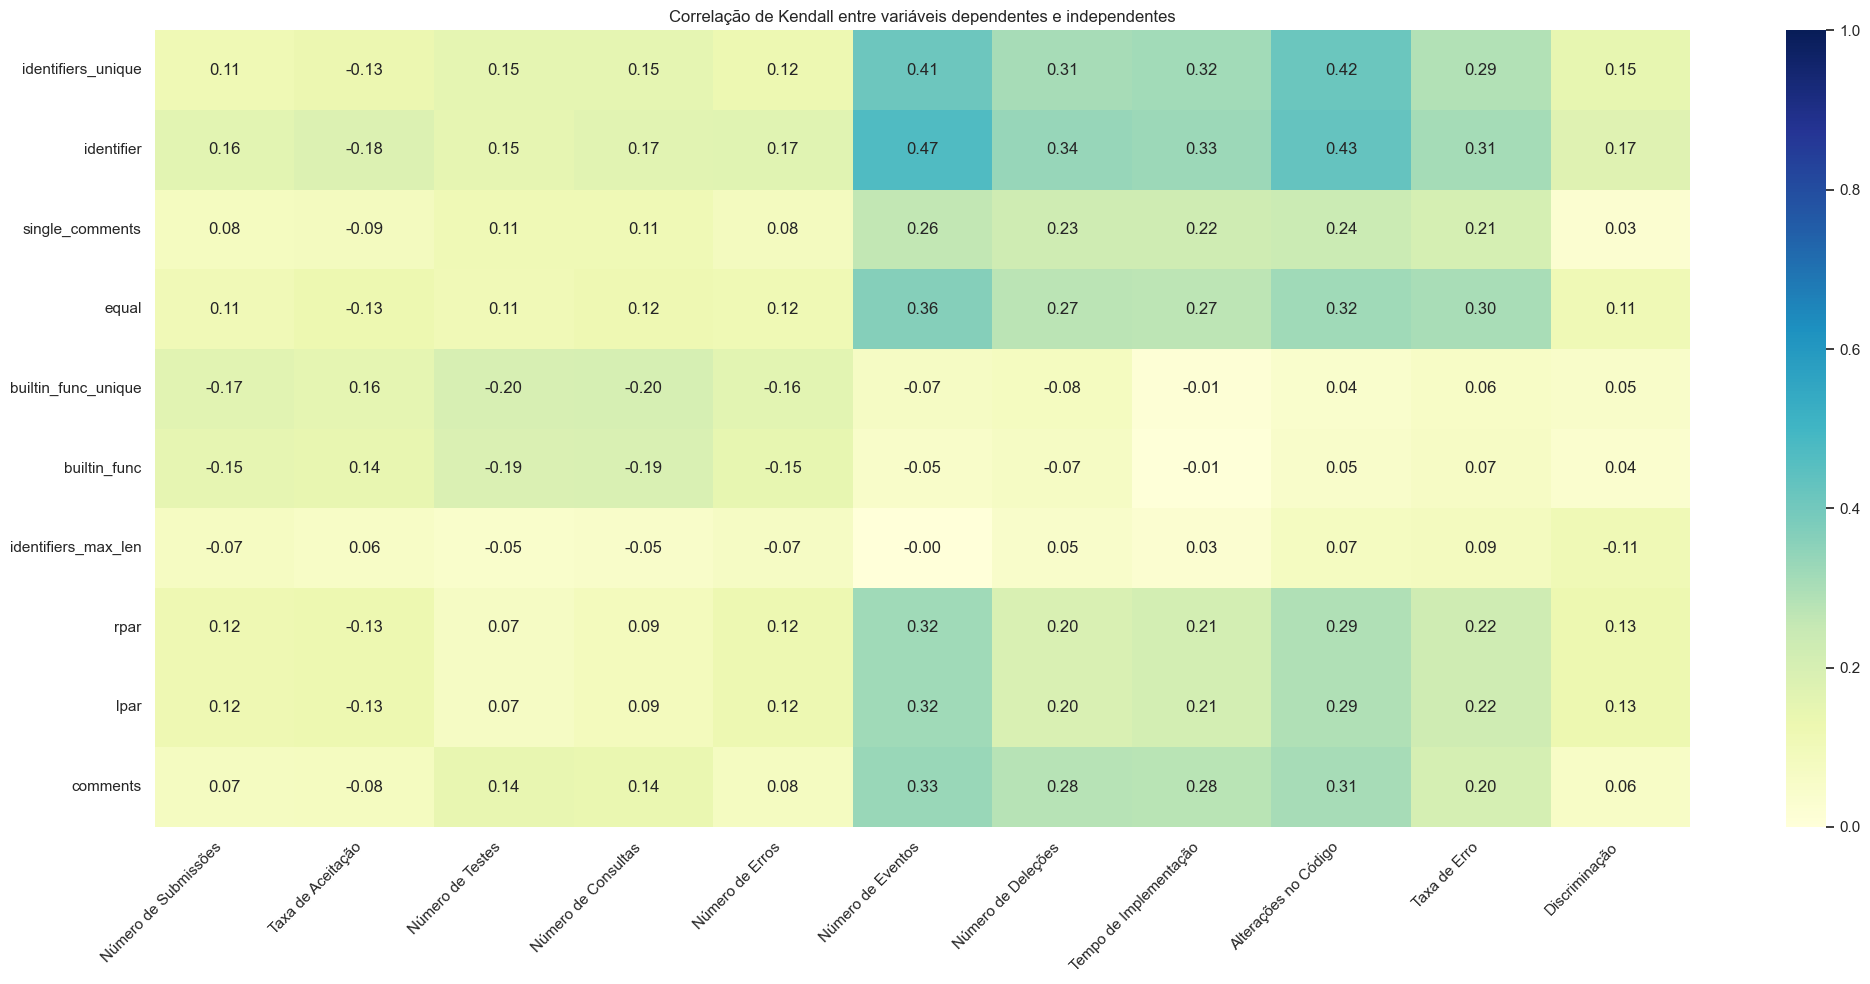

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Supondo que 'most_frequent_metrics_ls' e 'variaveis' estejam definidos
df_ind_corrs_best = pd.DataFrame(index=most_frequent_metrics_ls, columns=variaveis, dtype=np.float32)

# Iterar sobre as métricas e variáveis
for i in range(df_ind_corrs_best.shape[0]):
    for j in range(df_ind_corrs_best.shape[1]):
        # Extraia as séries, preenchendo NaNs com 0.0
        row_a = code_metrics_df[most_frequent_metrics_ls[i]].fillna(0.0)
        row_b = statistics_df[variaveis[j]].fillna(0.0)

        # Verifique se há variação suficiente nas séries para calcular a correlação
        if row_a.nunique() > 1 and row_b.nunique() > 1:
            # Alinhe os índices das duas séries (se necessário)
            combined_df = pd.concat([row_a, row_b], axis=1).dropna()

            if not combined_df.empty:
                # Calcule Kendall apenas se houver dados suficientes
                kendall_val, _ = kendalltau(combined_df.iloc[:, 0], combined_df.iloc[:, 1])
                # Convertendo para float32 antes de atribuir
                df_ind_corrs_best.iloc[i, j] = np.float32(kendall_val)
            else:
                df_ind_corrs_best.iloc[i, j] = np.nan  # Se não houver dados, atribua NaN
        else:
            df_ind_corrs_best.iloc[i, j] = np.nan  # Se uma das séries for constante, não calcule a correlação

# Preencher NaN com 0 para exibição no gráfico
df_ind_corrs_best = df_ind_corrs_best.fillna(0.0)

# Criação do heatmap
sns.set()
plt.figure(figsize=(21, 10))
ax = sns.heatmap(df_ind_corrs_best.abs(), vmin=0, vmax=1, annot=df_ind_corrs_best, fmt='.2f', xticklabels=labels, yticklabels=most_frequent_metrics_ls, cmap="YlGnBu")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.title("Correlação de Kendall entre variáveis dependentes e independentes")

save_plot_image(plt.gca().get_title())

plt.show()


In [122]:
print(df_ind_corrs_best)


                     num_submissoes  taxa_aceitacao  num_testes  \
identifiers_unique         0.114485       -0.130853    0.154172   
identifier                 0.163306       -0.183063    0.150545   
single_comments            0.080036       -0.085089    0.111295   
equal                      0.107763       -0.127603    0.108359   
builtin_func_unique       -0.167414        0.155615   -0.197502   
builtin_func              -0.152010        0.140778   -0.189955   
identifiers_max_len       -0.070961        0.062030   -0.045764   
rpar                       0.119348       -0.125387    0.069590   
lpar                       0.119348       -0.125387    0.069590   
comments                   0.074607       -0.080557    0.143045   

                     num_consultas  num_erros  num_eventos  num_eventos_del  \
identifiers_unique        0.153657   0.121112     0.411374         0.306865   
identifier                0.165027   0.171742     0.471607         0.335383   
single_comments          

## Correlação point-biserial

In [123]:
from scipy.stats import pointbiserialr

In [124]:
# Para row_a
print("Tamanho de row_a:", row_a.shape[0])

# Para row_b
print("Tamanho de row_b:", row_b.shape[0])
print(statistics_df.columns)  # Isso exibirá todas as colunas do DataFrame



Tamanho de row_a: 217
Tamanho de row_b: 217
Index(['num_submissoes', 'taxa_aceitacao', 'num_testes', 'num_consultas',
       'num_erros', 'num_eventos', 'num_eventos_del', 'tempo_implementacao',
       'qtd_alteracoes_codigo', 'taxa de erro', 'discriminacao'],
      dtype='object')


In [125]:
best_code_metrics

,1,2,3,4,5,6,7,8,9,10
num_submissoes,"(-0.17683526873588562, identifiers_unique)","(-0.16552986204624176, builtin_func_unique)","(-0.1591280698776245, builtin_func)","(-0.13510355353355408, identifier)","(-0.13298778235912323, single_comments)","(-0.12900422513484955, identifiers_max_len)","(-0.12443684041500092, equal)","(-0.12072931975126266, rpar)","(-0.12072931975126266, lpar)","(-0.11776667833328247, comments)"
taxa_aceitacao,"(0.1874566674232483, identifiers_unique)","(0.15880131721496582, builtin_func_unique)","(0.15082158148288727, builtin_func)","(0.14569413661956787, identifier)","(0.136404886841774, single_comments)","(0.13558988273143768, equal)","(0.13211765885353088, identifiers_max_len)","(0.12611228227615356, rpar)","(0.12611228227615356, lpar)","(0.12017259001731873, comments)"
num_testes,"(-0.17493417859077454, number_float)","(-0.160653755068779, identifiers_max_len)","(-0.13752837479114532, identifiers_mean_len)","(-0.11945504695177078, builtin_func_unique)","(0.11911728233098984, number_int)","(0.11832039803266525, not_eq)","(-0.11653066426515579, builtin_func)","(-0.1001734584569931, kwd_input)","(-0.08518762141466141, single_comments)","(-0.07906829565763474, identifiers_unique)"
num_consultas,"(-0.1643543243408203, identifiers_max_len)","(-0.1493142694234848, number_float)","(-0.13795918226242065, builtin_func_unique)","(-0.13409501314163208, identifiers_mean_len)","(-0.13324418663978577, builtin_func)","(0.12847983837127686, not_eq)","(-0.107563316822052, identifiers_unique)","(0.10347697138786316, number_int)","(-0.10181518644094467, single_comments)","(-0.09199979156255722, equal)"
num_erros,"(-0.18145181238651276, identifiers_unique)","(-0.16565434634685516, builtin_func_unique)","(-0.15812961757183075, builtin_func)","(-0.14043329656124115, identifier)","(-0.13342657685279846, single_comments)","(-0.13047587871551514, identifiers_max_len)","(-0.12957312166690826, equal)","(-0.1224377378821373, lpar)","(-0.1224377378821373, rpar)","(-0.11784850060939789, comments)"
num_eventos,"(-0.19278886914253235, identifiers_unique)","(-0.1801450252532959, equal)","(-0.17950654029846191, identifier)","(-0.13978269696235657, kwd_input)","(-0.13716726005077362, single_comments)","(-0.1303316354751587, sloc)","(-0.12872835993766785, lloc)","(-0.12872835993766785, newline)","(-0.12668384611606598, rpar)","(-0.12668384611606598, lpar)"
num_eventos_del,"(-0.169615238904953, kwd_input)","(-0.1527521312236786, equal)","(-0.15066803991794586, identifier)","(-0.1487320512533188, identifiers_unique)","(-0.11759591102600098, time)","(-0.11759591102600098, effort)","(-0.11729515343904495, single_comments)","(-0.11454992741346359, volume)","(-0.11454992741346359, bugs)","(-0.1134723350405693, identifiers_max_len)"
tempo_implementacao,"(-0.20480941236019135, identifiers_unique)","(-0.17319846153259277, identifier)","(-0.1471228152513504, builtin_func_unique)","(-0.14269699156284332, rsqb)","(-0.14269699156284332, lsqb)","(-0.14133745431900024, equal)","(-0.13929782807826996, builtin_func)","(-0.12958921492099762, slash)","(-0.11448517441749573, h2)","(-0.11305949836969376, comma)"
qtd_alteracoes_codigo,"(-0.16853532195091248, kwd_input)","(-0.15935125946998596, time)","(-0.15935125946998596, effort)","(-0.14426419138908386, h1)","(-0.1430884301662445, volume)","(-0.1430884301662445, bugs)","(-0.14077000319957733, N)","(-0.14035794138908386, N2)","(-0.13784000277519226, identifier)","(-0.13731016218662262, N1)"
taxa de erro,"(0.09366652369499207, dbl_star)","(0.0918092355132103, number_int)","(0.08431078493595123, dedent)","(0.08431078493595123, colon)","(0.08431078493595123, indent)","(0.07133355736732483, keyword)","(0.0676623210310936, difficulty)","(0.06571413576602936, blank_lines)","(-0.0636996403336525, number_float)","(0.06346114724874496, encoding)"


In [126]:
code_metrics_df

,complexity,n_classes,n_functions,loc,lloc,sloc,comments,single_comments,multi_comments,blank_lines,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
1640,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,6,1,3.40
1641,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,6,1,3.40
1642,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,6,1,3.40
1643,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,9,1,3.70
1644,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,10,1,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6834,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75
6835,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75
6836,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75
6837,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75


In [127]:
df

,num_students_interactions,num_submissions,num_tests,num_correct,num_errors,num_logic_errors,num_syntax_errors,amount_of_change,code_time,num_events,num_deletes,num_blank
question,,,,,,,,,,,,
5168,42,153,452,39,114,79,35,9187,1185.963,38646,2317,13
5932,25,40,246,22,18,16,2,4506,94.596,21435,1211,27
6471,35,52,302,35,17,9,8,5784,1040.063,17593,947,18
6476,27,44,173,25,19,1,18,7405,221.849,10042,552,13
5166,31,62,386,29,33,24,9,8903,0.000,25711,1765,11
...,...,...,...,...,...,...,...,...,...,...,...,...
6248,23,76,263,21,55,35,20,5406,2246.080,20890,912,8
6009,19,59,129,19,40,32,8,3096,349.110,14759,624,7
6013,22,30,108,22,8,7,1,1797,458.825,12316,584,0


In [128]:
dataset = code_metrics_df.merge(df, left_index=True, right_index=True)
dataset

,complexity,n_classes,n_functions,loc,lloc,sloc,comments,single_comments,multi_comments,blank_lines,...,num_tests,num_correct,num_errors,num_logic_errors,num_syntax_errors,amount_of_change,code_time,num_events,num_deletes,num_blank
1640,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,335,14,34,18,16,7419,0.000,30921,1340,9
1641,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,273,17,38,11,27,6714,7742.914,53860,2560,11
1642,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,647,22,103,57,46,13542,7070.727,75983,4024,19
1643,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,222,19,34,12,22,6220,8788.279,42334,1855,32
1644,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,278,14,54,37,17,8243,3086.392,45497,2582,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6834,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,135,17,31,3,28,6116,1274.455,22265,868,14
6835,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,218,27,18,7,11,5640,0.000,22411,1059,12
6836,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,161,15,64,22,42,8152,344.383,23577,1048,8
6837,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,166,19,91,19,72,7637,0.000,25889,1286,4


In [129]:
dataset.index.name = 'question'
best_code_metrics.index.name = 'metric'

In [130]:
valid_metrics = df_ind_corrs.dropna(how='all').index
valid_metrics

Index(['complexity', 'loc', 'lloc', 'sloc', 'comments', 'single_comments',
       'multi_comments', 'blank_lines', 'h1', 'h2', 'N1', 'N2', 'h', 'N',
       'calculated_N', 'volume', 'difficulty', 'effort', 'bugs', 'time',
       'string', 'newline', 'indent', 'dedent', 'lpar', 'rpar', 'lsqb', 'rsqb',
       'colon', 'comma', 'plus', 'minus', 'star', 'slash', 'less', 'greater',
       'equal', 'dot', 'percent', 'eq_equal', 'not_eq', 'less_eq',
       'greater_eq', 'dbl_star', 'plus_eq', 'dbl_slash', 'nl', 'encoding',
       'number_int', 'number_float', 'keyword', 'identifier', 'builtin_type',
       'builtin_func', 'kwd_print', 'kwd_input', 'builtin_type_unique',
       'builtin_func_unique', 'identifiers_unique', 'identifiers_max_len',
       'identifiers_min_len', 'identifiers_mean_len'],
      dtype='object')

In [131]:

save_statistics_to_csv(best_code_metrics,'best_code_metrics.csv') 



Arquivo salvo em: Correlations_CSV\best_code_metrics.csv


In [132]:
# Converter o índice para uma coluna chamada 'question', mantendo o índice original
code_metrics_df = code_metrics_df.reset_index(drop=False)  # Mantém o índice atual como uma coluna

# Renomeia a coluna 'index' para 'question'
code_metrics_df = code_metrics_df.rename(columns={'index': 'question'})

# Agora, defina 'question' como o índice novamente
code_metrics_df.set_index('question', inplace=True)

# Verifique a alteração
code_metrics_df


,complexity,n_classes,n_functions,loc,lloc,sloc,comments,single_comments,multi_comments,blank_lines,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
question,,,,,,,,,,,,,,,,,,,,,
1640,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,6,1,3.40
1641,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,6,1,3.40
1642,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,6,1,3.40
1643,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,9,1,3.70
1644,5.0,0.0,0.0,25.0,15.0,14.0,3.0,1.0,5.0,5.0,...,3.0,1.0,2.0,1.0,2,3,10,10,1,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6834,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75
6835,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75
6836,5.0,0.0,0.0,15.0,12.0,12.0,0.0,0.0,0.0,3.0,...,0.0,2.0,1.0,1.0,0,4,4,8,1,4.75


In [133]:

save_statistics_to_csv(code_metrics_df[valid_metrics],'code_metrics.csv') 



Arquivo salvo em: Correlations_CSV\code_metrics.csv
